# Import Notebook

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Constants

In [43]:
path_root = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/01_Processing/'

path_root_text = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/02_Training/'

path_root_testing = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/03_Testing/'

# Saving all the data of spam and non spam emails 
TOKEN_SPAM_PROB_FILE = path_root_testing + 'prob-spam.txt'
TOKEN_HAM_PROB_FILE = path_root_testing + 'prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = path_root_testing + 'prob-all-tokens.txt'


TEST_FEATURE_MATRIX = path_root_testing + 'test-features.txt'
TEST_TARGET_FILE = path_root_testing + 'test-target.txt'

VOCAB_SIZE = 2500


# Load the Data 

In [44]:
#Features 
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
# Token Probabilities 
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

In [45]:
x_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Calculating the joint probability
### The Dot Product 

In [46]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ',a)
print('b = ',b)

a =  [1 2 3]
b =  [0 5 4]


In [47]:
a.dot(b)

22

In [48]:
1*0 + 2*5 + 3*4

22

In [49]:
c = np.array([[0,6],[3,0],[5,1]])

In [50]:
print('Shape of C is', c.shape)

Shape of C is (3, 2)


In [51]:
print(c)

[[0 6]
 [3 0]
 [5 1]]


In [52]:
print(a.dot(c))
print('Shape of the dot product is', a.dot(c).shape)

[21  9]
Shape of the dot product is (2,)


In [53]:
[1*0 + 2*3 + 3*5, 1 * 6 + 2 * 0 + 3 * 1]

[21, 9]

**Challenge**: Can you figure out the dimensions of the dot product between X_test and prob_token_spam? 

In [54]:
x_test.shape

(1724, 2500)

In [55]:
prob_token_spam.shape

(2500,)

In [56]:
x_test_dot = x_test.dot(prob_token_spam).shape
print('Shape of the dot product is', x_test_dot)

Shape of the dot product is (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [57]:
PROB_SPAM = 0.3116

**Challenge**: Do you recall how to take the log of a numpy array? Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam. 

In [58]:
np.log(prob_token_spam)

array([-4.40770937, -5.25378417, -4.99018661, ..., -9.79174561,
       -8.69313332, -9.69643543])

## Joint probability in log format

In [59]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) - np.log(prob_all_token)) + np.log(PROB_SPAM)

In [60]:
joint_log_spam[:5]

array([24.26498824,  2.15891718, 20.58703011, 17.73703527, 21.33965786])

**Challenge**: Calculate the log probability that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [61]:
joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_token)) + np.log(1 - PROB_SPAM)

In [62]:
joint_log_ham[:5]

array([-60.96015387, -11.00851939, -37.96504727, -59.12274362,
       -55.59741072])

In [63]:
joint_log_ham.shape

(1724,)

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center>OR</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

**Challenge**: Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called `prediction`.

In [64]:
prediction = joint_log_spam > joint_log_ham

In [65]:
prediction[-5:]

array([ True, False, False, False, False])

In [66]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [67]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = x_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

In [68]:
joint_log_spam[:5]

array([-1220.39618318,  -262.92130083,  -411.42161249, -1473.17403812,
       -1248.77771596])

In [69]:
joint_log_ham[:5]

array([-1305.62132529,  -276.0887374 ,  -469.97368986, -1550.03381701,
       -1325.71478453])

# Metrics and Evaluation

## Accurary

In [70]:
correct_doc = (y_test == prediction).sum()
print('Doc Classified correctly', correct_doc)

Doc Classified correctly 1685


In [71]:
numdocs_wrong = x_test.shape[0] - correct_doc
print('Docs classified incorrectly', numdocs_wrong)

Docs classified incorrectly 39


In [72]:
# Accuracy
correct_doc / len(x_test)

0.9773781902552204

In [73]:
fraction_wrong = numdocs_wrong / len(x_test)
print('Fraction classified incorrect is {:.2%}'.format(fraction_wrong))

Fraction classified incorrect is 2.26%


In [74]:
print('Accuracy of the model is {:.2%}'.format(1 - fraction_wrong))

Accuracy of the model is 97.74%


## Visualising the Results

In [75]:
# Chart Styling infor
yaxis_label = 'p(x|spam)'
xaxis_label = 'p(y|NonSpam)'

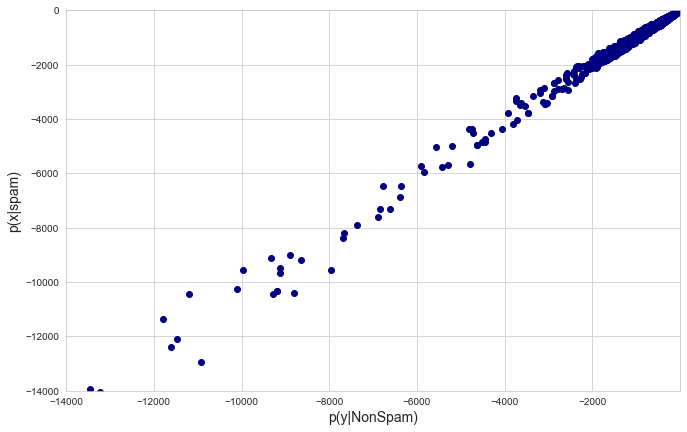

In [76]:
plt.figure(figsize = (11,7))
plt.xlabel(xaxis_label,fontsize =14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,-1])
plt.ylim([-14000,1])

plt.scatter(joint_log_spam,joint_log_ham,color='navy')
plt.show()

In [77]:
linedata = np.linspace(start = -14000, stop = 1, num=1000)

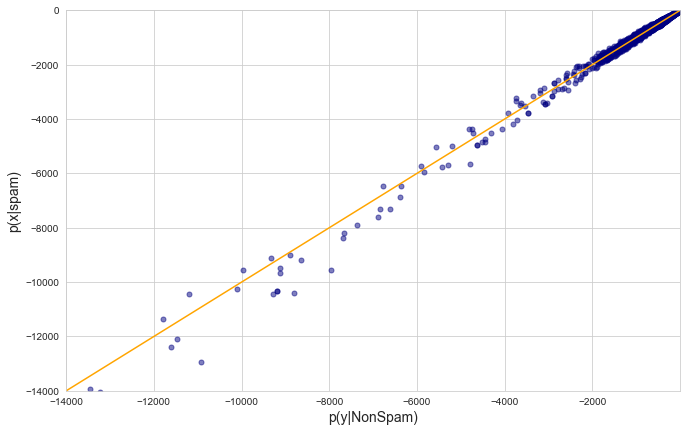

In [78]:
plt.figure(figsize = (11,7))
plt.xlabel(xaxis_label,fontsize =14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,-1])
plt.ylim([-14000,1])

plt.scatter(joint_log_spam,joint_log_ham,color='navy',alpha=0.5,s=25)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

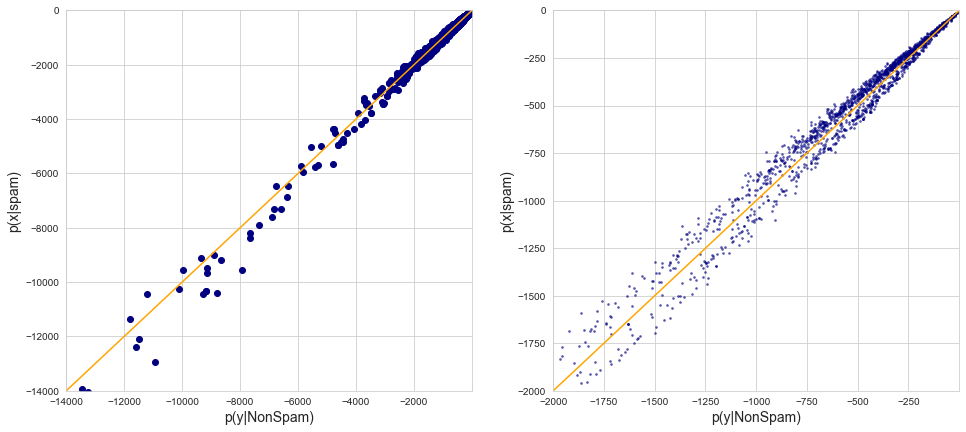

In [79]:
# Zoomed Map

plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
plt.xlabel(xaxis_label,fontsize =14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,-1])
plt.ylim([-14000,1])
plt.scatter(joint_log_spam,joint_log_ham,color='navy')
plt.plot(linedata, linedata, color = 'orange')

# Chart 2
plt.subplot(1,2,2)
plt.xlabel(xaxis_label,fontsize =14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-2000,-1])
plt.ylim([-2000,1])
plt.scatter(joint_log_spam,joint_log_ham,color='navy',alpha=0.5,s=3)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

In [80]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,labels: y_test})

C:\Users\97798\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(-2000.0, 1.0)

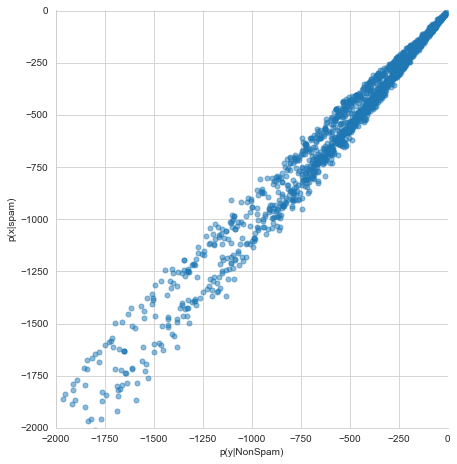

In [81]:
sns.lmplot(x = xaxis_label, y = yaxis_label,data = summary_df,size = 6.5, fit_reg = False,
           scatter_kws = {'alpha':0.5,'s':25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])

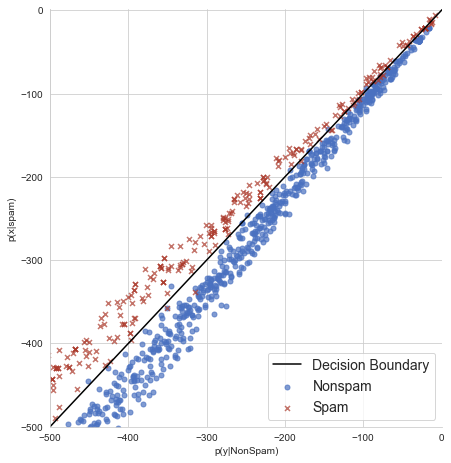

In [82]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x = xaxis_label, y = yaxis_label,data = summary_df,size = 6.5, fit_reg = False,
           scatter_kws = {'alpha':0.7,'s':25},hue=labels,markers=['o','x'],palette = my_colours,legend=False)

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positive and False Negatives

In [83]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [84]:
true_pos = (y_test == 1) & (prediction==1)

In [85]:
true_pos.sum()

569

In [86]:
true_pos

array([ True,  True,  True, ..., False, False, False])

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [87]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [88]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [90]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 96.60%


## Precision Score

**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [91]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


## F-Score or F1 Score

In [92]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
